In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("Phishing_Legitimate_full.csv")

In [3]:
df.head(30)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
5,6,3,1,1,42,1,0,0,0,0,...,1,1,0,1,1,1,1,-1,1,1
6,7,2,0,5,60,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,-1,1
7,8,1,0,3,30,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
8,9,8,7,2,76,1,1,0,0,0,...,0,0,0,-1,-1,1,1,1,-1,1
9,10,2,0,2,46,0,0,0,0,0,...,0,0,0,1,1,1,1,-1,-1,1


<Axes: >

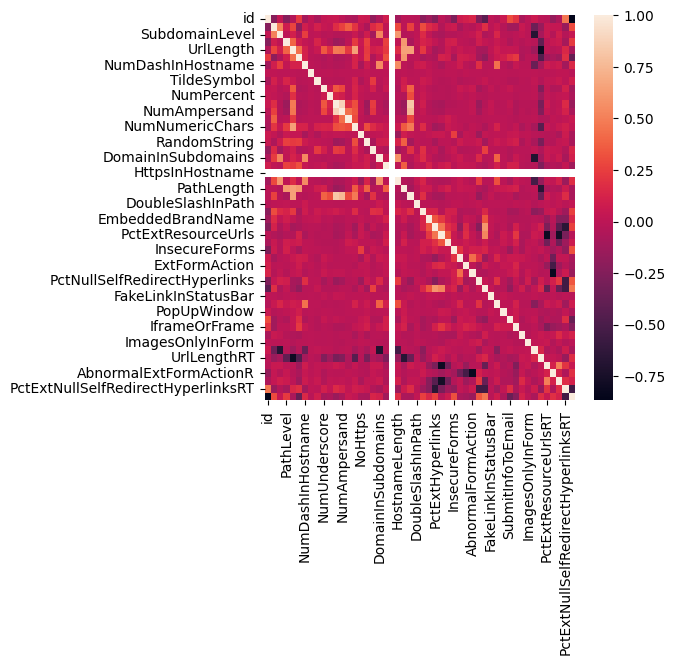

In [4]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr())

In [7]:
x = df.drop(columns=['id', 'CLASS_LABEL'])
y = df['CLASS_LABEL']

In [10]:
X_number = x.select_dtypes(include=np.number)

In [11]:
selector = SelectKBest(score_func=f_classif, k=12)
X_selector = selector.fit_transform(X_number, y)

C:\Users\SYED MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\SYED MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [15]:
selected_features = X_number.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['NumDots', 'PathLevel', 'NumDash', 'NumSensitiveWords', 'PctExtHyperlinks', 'InsecureForms', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'SubmitInfoToEmail', 'IframeOrFrame', 'AbnormalExtFormActionR', 'PctExtNullSelfRedirectHyperlinksRT']


In [18]:
X = df[selected_features]
Y = df['CLASS_LABEL']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3, stratify=Y)

In [20]:
scaler = StandardScaler()

In [21]:
x_scaler_train = scaler.fit_transform(x_train)

In [23]:
x_scaler_test = scaler.transform(x_test)

In [25]:
model_svc = SVC(kernel='rbf', C=1, gamma='scale')
model_log = LogisticRegression()
model_random = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)

In [28]:
model_svc.fit(x_scaler_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
Y_pred = model_svc.predict(x_scaler_test)

In [34]:
model_log.fit(x_scaler_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
y_pred_log = model_log.predict(x_scaler_test)

In [38]:
model_random.fit(x_scaler_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
y_pred_random =  model_random.predict(x_scaler_test)

In [33]:
accuracy = accuracy_score(y_test, Y_pred)
print("accuracy: ", accuracy)

accuracy:  0.944


In [44]:
y_pred_labels = (y_pred_log > 0.5).astype(int)

print(classification_report(y_test, y_pred_labels))


              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1500
           1       0.90      0.93      0.92      1500

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [45]:
y_pred_label = (y_pred_random > 0.5).astype(int)

print(classification_report(y_test, y_pred_label))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1500
           1       0.97      0.98      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

